### Constants or conversions you may need for this homework:  
$L_v = 2.5 \times 10^6 \, \text{J kg}^{-1}$  
$R_d = 287 \, \text{J kg}^{-1} \text{K}^{-1}$  
$R_v = 461 \, \text{J kg}^{-1} \text{K}^{-1}$  
$g = 9.81 \, \text{m s}^{-2}$  
$\rho_w = 1000 \, \text{kg m}^{-3}$  
$0^\circ\text{C} = 273.15 \, \text{K}$  





### **Problem 1: What is an adiabatic process? Why do air parcels cool when they are lifted in the atmosphere?**  
#### Explain using relevant law(s) of thermodynamics.  

An adiabatic process is a change in temperature of a control volume without exchange of heat with its environment. This can be explained by the ideal gas law, which states that changes in temperature are proportional with changes in pressure. As a control volume of air rises, it necessarily lowers in pressure and expands (less air above it exterting pressure) and the temperature of the control volume then also lowers.

An adiabatic process is closely related to the first law of thermodynamics, which states that the energy within a closed system is conserved. In the context of a rising air parcel in the atmosphere, this law implies that if there is no heat exchange with the surroundings (an adiabatic process), any work done by the air parcel during its expansion must come from its internal energy. As the air parcel rises, it expands due to the decrease in atmospheric pressure with altitude. This expansion is work that the air parcel does against the surrounding air pressure.

According to the first law of thermodynamics, the energy used for this expansion work reduces the internal energy of the air parcel. Because the internal energy of a gas is directly related to its temperature, a decrease in internal energy means the temperature of the air parcel decreases. This cooling effect is why air parcels cool as they are lifted in the atmosphere, assuming the process is adiabatic, meaning no heat is exchanged with the environment.

The ideal gas law (PV = nRT), where P is pressure, V is volume, n is the number of moles of gas, R is the universal gas constant, and T is temperature, supports this explanation. As the volume (V) increases with the air parcel's ascent and expansion (due to decreasing pressure, P), and assuming the amount of gas (n) and the universal gas constant (R) remain constant, the temperature (T) must decrease. 







### **Problem 2:** 
An air parcel near the surface has a temperature of 25ºC, a specific humidity of 12 g/kg, and surface pressure of 101,300 Pa.** Suppose that the temperature profile of the ambient air is given by:  

$$T(z) = T_{\text{surface}} - \Gamma_a \ast z$$

where the ambient lapse rate, $\Gamma_a = 7.5 \times 10^{-3} \, \text{K/m}$ and $T_{\text{surface}} = 25^\circ\text{C}$. The pressure profile for an environment with a linear temperature lapse rate can be derived from the hydrostatic equation and the ideal gas law and is equal to:  

$$p(z) = p_{\text{surface}} \left( \frac{T(z)}{T_{\text{surface}}} \right)^{\frac{g}{R_d \Gamma_a}}$$

a) Generate a plot of $q_s$ as a function of atmospheric height, $z$, from the surface to the approximate tropopause height (12km).  
b) If the air parcel is lifted adiabatically, at what height would you expect a cloud to form? In other words, what is the lifting condensation level, defined as the point where $q = q_s$?  

LCL height:  1002
[0.0098    0.0098    0.0098    ... 0.0091588 0.0091593 0.0091598]
[0.01984242 0.01983283 0.01982325 ... 0.00023914 0.00023892 0.0002387 ]
0.012


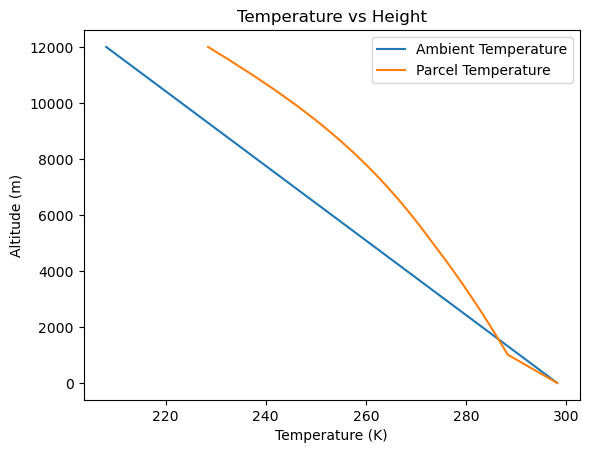

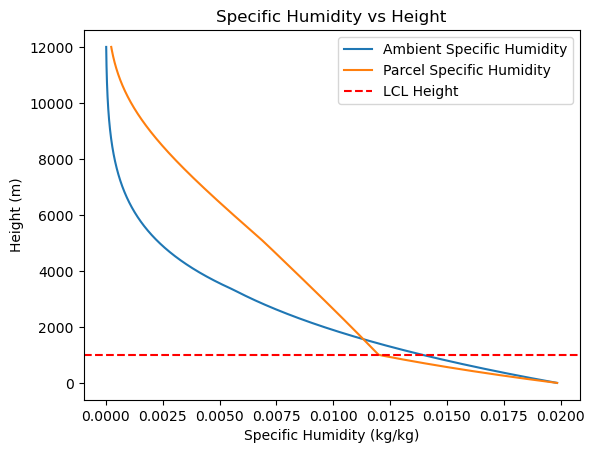

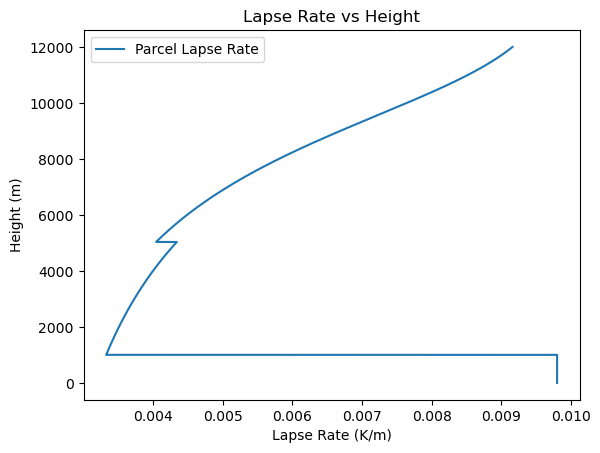

In [36]:
#Part a: Generate a plot of q_s vs z from the surface to 12 km
import numpy as np
import matplotlib.pyplot as plt

# Constants
ambient_lapse_rate = 7.5 * 10**-3  # K/m
dry_lapse_rate = 9.8 * 10**-3  # K/m
T_s = 273.15 + 25  # K
P_s = 101300  # Pa
q_parcel = 12/1000  # kg/kg
R_d = 287  # J/kg/K
R_v = 461  # J/kg/K
epsilon = R_d / R_v
L_v = 2.5 * 10**6  # J/kg
L_s = 2.83 * 10**6  # J/kg
g = 9.81  # m/s^2
c_p = 1005  # J/kg/K

# Functions
def calc_ambient_temp(z):
    return T_s - ambient_lapse_rate * z

def calc_ambient_pressure(z):
    T = calc_ambient_temp(z)
    return P_s * (T/T_s)**(g / (ambient_lapse_rate * R_d))

def calc_e_sat(T):
    L_term = np.where(T > 273.15, L_v, L_s)
    return 611 * np.exp((L_term / R_v) * (1 / 273.15 - 1 / T))

def calc_qs(T, P):
    return epsilon * calc_e_sat(T) / P

def calc_moist_lapse_rate(T, dqs_dT):
    L_term = np.where(T > 273.15, L_v, L_s) #latent heat of vaporization if T > 0, latent heat of sublimation if T <= 0
    return  dry_lapse_rate / (1 + ((L_term / c_p) * dqs_dT))

# Calculate des/dT using Clausius Claperyon equation

# dqs/dT = epsilon / P * des/dT, des/dT  = Lv * es /(Rv * T^2)
# Margulis 

# Initialization
z = np.linspace(0, 12000, 12000) #height in meters
T_amb = calc_ambient_temp(z)
P = calc_ambient_pressure(z)
qs_amb = calc_qs(T_amb, P)

T_parcel = np.zeros(len(z))
T_parcel[0] = T_s
qs_parcel = np.zeros(len(z))
qs_parcel[0] = calc_qs(T_s, P_s)
parcel_lapse_rate = np.full(len(z), dry_lapse_rate)

for i in range(1, len(z)):
    dqs_dT = (epsilon / P[i]) * ((L_v * calc_e_sat(T_parcel[i-1])) / (R_v * T_parcel[i-1]**2))
    
    if qs_parcel[i-1] < q_parcel and i > 25:
        parcel_lapse_rate[i] = calc_moist_lapse_rate(T_parcel[i-1], dqs_dT)
    
    dz = z[i] - z[i-1]
    T_parcel[i] = T_parcel[i-1] - dz * parcel_lapse_rate[i]
    qs_parcel[i] = calc_qs(T_parcel[i], P[i])
    
LCL_height = np.where(qs_parcel <= q_parcel)[0][0]
print("LCL height: ", LCL_height)
print(parcel_lapse_rate)
print(qs_parcel)
print(q_parcel)
#Plot temps
plt.plot(T_amb, z, label='Ambient Temperature')
plt.plot(T_parcel, z, label='Parcel Temperature')
plt.xlabel('Temperature (K)')
plt.ylabel('Altitude (m)')
plt.title('Temperature vs Height')
plt.legend()
plt.show()

# plot q_parcel and q_amb vs z
plt.plot(qs_amb, z, label='Ambient Specific Humidity')
plt.plot(qs_parcel, z, label='Parcel Specific Humidity')
#plot horitzontal line at 1100 
plt.axhline(LCL_height, color='r', linestyle='--', label='LCL Height')
plt.xlabel('Specific Humidity (kg/kg)')
plt.ylabel('Height (m)')
plt.title('Specific Humidity vs Height')
plt.legend()
plt.show()

#plot lapse rate vs z
plt.plot(parcel_lapse_rate, z, label='Parcel Lapse Rate')

plt.xlabel('Lapse Rate (K/m)')
plt.ylabel('Height (m)')
plt.title('Lapse Rate vs Height')
plt.legend()
plt.show()


### **c): Will parcel be negatively, positvely, or neutrally buoyant?**
#### The parcel will be positively buoyant compared to the environment. Because the tempeature and specific humidity of the parcel are higher than the temperature and specific humidity in the environment, the parcel will be less dense than its environment, which makes it positively buoyant. (No heat added to the system --> Higher temperature leads to lower density according to ideal gas law. Also, a higher specific humidity at a higher temperature means there is a higher moisture content in the parcel, which also leads to a lower density than the environemnt.)

### **d) What is the moist adiabatic lapse rate at the LCL?** 
Hint:  

$$\frac{d(e^{a-\frac{b}{x}})}{dx} = \frac{b \ast e^{a-\frac{b}{x}}}{x^2}$$

#### $$ \Gamma_s = \frac{\Gamma_d}{1 + \left( \frac{L_v}{c_p} \frac{dqs}{dT} \right)} $$

#### $$ T_{LCL} = T_{surface} - \Gamma_a \cdot z $$

#### $$ P_{LCL} = P_{surface} \left( \frac{T_{LCL}}{T_{surface}} \right)^{\frac{g}{R_d \Gamma_a}} $$

#### $$ q_s(z) = \frac{\varepsilon \cdot 611 \cdot \exp\left(\frac{L_v}{R_v} \left(\frac{1}{273.15} - \frac{1}{T_s - \Gamma_d \cdot z}\right)\right)}{P_s \cdot \left(\frac{T_s - \Gamma_a \cdot z}{T_s}\right)^{\frac{g}{\Gamma_a \cdot R_d}}} $$

#### $$ q_s(z_{LCL}) = \frac{\varepsilon \cdot 611 \cdot \exp\left(\frac{L_v}{R_v} \left(\frac{1}{273.15} - \frac{1}{T_{LCL}}\right)\right)}{P_{LCL}} $$


#### $$ \frac{dq_s}{dT} = \frac{\varepsilon}{P_{LCL}} \cdot \left(\frac{L_v}{R_v}\right) \cdot 611 \cdot \exp\left(\frac{L_v}{R_v} \cdot \left(\frac{1}{T_o} - \frac{1}{T_{LCL}}\right)\right) \cdot \frac{1}{{(T_{LCL})}^2} $$






In [25]:
def calc_dqs_dT_LCL(z):
    return epsilon / calc_ambient_pressure(z) * (L_v / R_v) * 611 * np.exp((L_v / R_v) * (1 / 273.15 - 1 / calc_ambient_temp(z))) / (calc_ambient_temp(z)**2)

P_LCL = calc_ambient_pressure(LCL_height)
T_LCL = calc_ambient_temp(LCL_height)
dqs_dT = calc_dqs_dT_LCL(LCL_height)
LCL_lapse_rate = dry_lapse_rate / (1 + ((L_v / c_p) * dqs_dT))
print(f"The LCL Height is {LCL_height:.2f} m")
print(f"The pressure at the LCL is {P_LCL:.1f} Pa")
print(f"The temperature at the LCL is {T_LCL:.2f} K")
print(f"dqs_dT at the LCL is {dqs_dT:.2e} kg/kg/K")
print(f"The moist adiabatic lapse rate at the LCL is {LCL_lapse_rate:.2e} K/m")
#L_v units are J/kg, R_v units are J/kg/K, so L_v / R_v units are K
#epsilon is unitless, so dqs_dT units are kg/kg/K/m


The LCL Height is 10371.00 m
The pressure at the LCL is 25542.8 Pa
The temperature at the LCL is 220.37 K
dqs_dT at the LCL is 1.43e-05 kg/kg/K
The moist adiabatic lapse rate at the LCL is 9.46e-03 K/m


### e) **Generate a plot showing the temperature of the environment and the temperature of the parcel as a function of atmospheric height, $z$, from the surface to the approximate tropopause height (12km).** 

Assume the parcel is lifted adiabatically.  

### f) **Approximately what heights correspond to the level of free convection and the level of neutral buoyancy?**  


In [26]:

T = calc_ambient_temp(z)
P = calc_ambient_pressure(z)


# Calculate the difference in temperatures
temperature_difference = T_parcel - T_amb
# Filter out changes smaller than 0.1 K to avoid numerical noise
temperature_difference = np.where(np.abs(temperature_difference) > 0.1, temperature_difference, 0)
sign_changes = np.diff(np.sign(temperature_difference)) # Find where the sign of the difference changes 
crossing_indices = np.where(sign_changes != 0)[0]
# Since the crossing happens between two points, calculate the midpoint for a better approximation
crossing_heights = (z[crossing_indices] + z[crossing_indices + 1]) / 2

LFC = crossing_heights[-2] # The second to last crossing is the LFC
LNB = crossing_heights[-1] # The last crossing is the LNB

print(f"The level of free convection is at {LFC:,.1f} m")
print(f"The level of neutral buoyancy is at {LNB:,.1f} m")

plt.plot(T, z, label='Ambient Temperature')
plt.plot(T_parcel, z, label='Parcel Temperature')
plt.axhline(y=LCL_height, color='r', linestyle='--', label='LCL height')
plt.axhline(y=LFC, color='g', linestyle='--', label='LFC height')
plt.axhline(y=LNB, color='b', linestyle='--', label='LNB height')
plt.xlabel('Temperature (K)')
plt.ylabel('Height (m)')
plt.title('Temperature vs Height')
plt.legend()
plt.show()


IndexError: index -2 is out of bounds for axis 0 with size 1

### **Problem 3: Meteorology of Precipitation**  
a. **What are the four main mechanisms of vertical uplift in the atmosphere that lead to cloud formation and precipitation?** Provide a short description of each mechanism.  

1) Large Scale Convergence
    - Rising air caused by convergence of air driven by large scale horizontal pressure gradients in the atmosphere. One of the places this occurs is at the intertropical convergence zone, where two Hadley cells meet: as moist air rises, water vapor condenses out into clouds and eventually rain. 
2) Frontal Systems Convergence
    - Where two airs masses of different temperatures converge. In a warm front, a mass of warm air gradually rises as it is forced over a mass of cold air, causing water to condense out of the warm air. In a cold front, a mass of cold air is forced towards a mass of warm air, causing the warm air to rise rapidly. Cold fronts are mor spatially concentrated, and because they result in more rapid rising of warm air they also result in more intense precipitation.
3) Orographic Uplift
    - This is uplift of air caused by topography. A mass of air is forced up when it encounters a mountain range, which causes it to cool and condense out water on the windward side of the mountain range, and adiabatically descend as warm, dry air on the leeward side. 
4) Thermal/Convective Uplift
    - This is uplift caused by shortwave radiation from the sun warming a surface, which causes the air above the surface to warm and rise above the relatively cool air above. This is driven by diurnal abd seasonal cycles, which determine the duration and intensity of incoming shortwave radiation.  

b. **Choose a location that interests you and read about the precipitation in that location. What are the main mechanisms leading to precipitation in that location? Is there a strong seasonal cycle in precipitation in that location? Why?**  

**Drivers of precipitation in Coastal Southern California**


The major weather patterns in California are driven by large scale convergence associated with seasonal movement of the intertropical convergence zone (ITCZ). In California, precipitation is significantly influenced by a semi-permanent high-pressure area in the north Pacific Ocean, which shifts north in summer, blocking storms and reducing summer precipitation. In winter, it moves south, allowing storms to bring rain to the region. Occasionally, atmospheric changes enable storms to approach from the southwest, bringing substantial moisture to California. 

Atmospheric rivers are a major precipitation source in California, contributing up to 50% of the state's annual precipitation and streamflow during fall and winter. These rivers form from extratropical cyclones over the North Pacific, drawing warm tropical air and transporting vast amounts of water vapor to California. The Pineapple Express is a notable atmospheric river that carries moisture from near Hawaii to the US West Coast. In El Niño years, such as 2024, altered atmospheric patterns and warmer sea temperatures can increase the formation, persistence, and intensity of atmospheric rivers, leading to more extreme precipitation. 

Southern California's coastal mountains amplify the impact od atmospheric rivers through orographic uplift, which increases precipitation on the mountains' west (leeward) side and creates drier conditions on the east.

Sources:
- [A Climate Expert Explains Why Atmospheric Rivers Are Causing Historic Rainfall in California](https://news.climate.columbia.edu/2024/02/05/a-climate-expert-explains-why-atmospheric-rivers-are-causing-historic-rainfall-in-california/)
- [Narrative about California's Climate](https://wrcc.dri.edu/Climate/narrative_ca.php)




### **Problem 4:**

Suppose a cloud has a Marshall-Palmer drop size distribution with an average drop diameter of 1 mm and $N_0 = 8000 \, \text{m}^{-3} \, \text{mm}^{-1}$.

**a. What is the total number of drops in the cloud (per cubic meter of air)?**  

$$
c = \frac{1}{\overline{D}} = \frac{1}{1 \, \text{mm}} = 1 \, \text{mm}^{-1}
$$


$$
\int_{0}^{\infty} N_{o} \cdot \exp(-cD) \, dD
$$

$$
= -\frac{N_{0}}{c} \left. e^{-cD} \right|_{0}^{\infty}
$$

$$
= -\frac{N_{0}}{c} [0 - (-1)] = \frac{N_{0}}{c}
$$

$$
= \frac{8000 \, \text{m}^{-3} \, \text{mm}^{-1}}{1 \, \text{mm}^{-1}} = 8000 \, \text{drops} / \text{m}^{3}
$$


**b. What is the liquid water content of the cloud (in grams per cubic meter of air)?**  
Show all steps in your calculation. Hint: a helpful integral is $\int_0^\infty x^n e^{-\alpha x} dx = \frac{n!}{\alpha^{n+1}}$

$$ c = 1 \, \text{mm}^{-1} $$ 
$$\rho_w = 1000 \, \text{kg m}^{-3}$$  
$$N_0 = 8000 \, \text{m}^{-3} \, \text{mm}^{-1}$$

$$
\text{LWC} = \rho_w \pi \int_{0}^{\infty} \frac{D^3}{6} N_{0} e^{-cD} \, dD = \rho_w \pi N_{0} \int_{0}^{\infty} \frac{D^3}{6} e^{-cD} \, dD = \rho_w \pi N_{0} \frac{3!}{c^4} 
$$


$$
\begin{align*}
&= \rho_w \pi N_{0} \frac{1}{c^4} \\
&= 1000 \, \text{kg m}^{-3} \cdot \pi \cdot 8000 \, \text{m}^{-3} \, \text{mm}^{-1} \cdot \frac{1}{(1 \, \text{mm}^{-1})^4} \\
&= 1000 \, \text{kg m}^{-3} \cdot \pi \cdot 8000 \, \text{m}^{-3} \, \text{mm}^{-1} \cdot \frac{1}{1^4 \, \text{mm}^{-4}} \\
&= 1000 \cdot 8000 \cdot \pi \, \text{kg m}^{-3} \, \text{m}^{-3} \, \text{mm}^{-1} \cdot \text{mm}^{4} \\
&= 8 \times 10^6 \cdot \pi \, \text{kg} \, \text{m}^{-6} \, \text{mm}^{3} \\
&= 8 \times 10^6 \cdot \pi \, \text{kg} \, \text{m}^{-6} \, \left(\frac{1}{1000}\right)^3 \, \text{m}^{3} \\
&= 8 \times 10^6 \cdot \pi \cdot 10^{-9} \, \text{kg} \, \text{m}^{-3} \\
\end{align*}
$$

$$ LWC = 25.1 \, \text{g} \, \text{m}^{-3}$$

**c. Assume that the terminal velocity of droplets in the cloud follows a linear form with multiplicative factor $\alpha = 1500 \, \text{s}^{-1}$ and that the cloud has an updraft velocity of $3 \, \text{m s}^{-1}$. What is the minimum drop size that will precipitate out of the cloud?**  

$$
\begin{align*}
V_t(D_{\text{up}}) - V_{\text{up}} &= \alpha D_{\text{up}} - V_{\text{up}} = 0 \\
\Rightarrow D_{\text{up}} &= \frac{V_{\text{up}}}{\alpha} = \frac{3 \, \text{m s}^{-1}}{1500 \, \text{s}^{-1}} = 2 \, \text{mm}
\end{align*}
$$


**d. Calculate the precipitation rate at the surface $\frac{\text{mm}}{\text{hr}}$.** You can assume that evaporation in the sub-cloud layer is negligible. Note that since the limits of the integral have changed, you can no longer use the hint from part b) and you may want to integrate numerically to get your answer.

$$
P_b = \int_{D_{\text{up}}}^{\infty} \pi \frac{D^3}{6} N_0 e^{-cD}[\alpha D - V_{\text{up}}] \, dD
$$

$$
P_b = \int_{2 \, \text{mm}}^{\infty} \pi \frac{D^3}{6} \cdot 8000 \, \text{m}^{-3} \, \text{mm}^{-1} \cdot e^{-D} \left[1500 \, \text{s}^{-1} \cdot D - 3000 \, \text{mm s}^{-1}\right] \, dD
$$

$$ c = 1 \, \text{mm}^{-1} $$ 
$$N_0 = 8000 \, \text{m}^{-3} \, \text{mm}^{-1}$$
$$\alpha = 1500 \, \text{s}^{-1}$$
$$ D_{\text{up}} = 2 \, \text{mm} $$
$$ V_{\text{up}} = 3 \, \text{m s}^{-1} $$

In [ ]:
from scipy.integrate import quad
import numpy as np

N_0 = 8000 *1000 # m^-4
c = 1 * 1000 # m^-1
alpha = 1500  # s^-1
D_up = 2  / 1000 # m 
V_up = 3 # m/s

# Define the integrand based on Pb equation above
def integrand(D):
    return np.pi * (D**3 / 6) * N_0 * np.exp(-c * D) * (alpha * D - V_up)

# Perform numerical integration from D_up to infinity
result, error = quad(integrand, D_up, np.inf)

#convert result from m/s to mm / hr
sec_to_hr = 3600
m_to_mm = 1000
result = result * sec_to_hr * m_to_mm

print(f"The precipitation rate is {result:.2f} mm/hr")

#convert mm to inches
mm_to_in = 0.0393701
result *= mm_to_in
print(f"The precipitation rate is {result:.2f} inches/hr")


The precipitation rate is 281.63 mm/hr
The precipitation rate is 11.09 inches/hr
